ROC-AUC metrics equals to 0.89


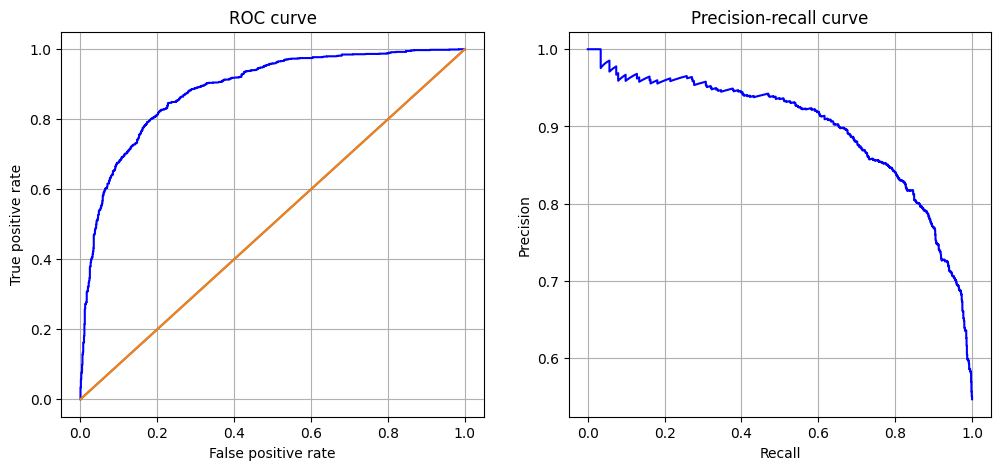

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

data = pd.read_csv('athletes.csv');

cleanData = data.dropna()

X = cleanData.loc[:,['height','weight','sport']]

X = pd.get_dummies(X, columns=['sport'], dtype='int', drop_first=True)

le = LabelEncoder()
le.fit(cleanData['sex'])
y = pd.Series(le.transform(cleanData['sex']))

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict_proba(X_test)

fpr, tpr, thres = roc_curve(y_test, predictions[:,1])
pr, re, trh = precision_recall_curve(y_test, predictions[:,1])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(fpr, tpr, color='blue')
axs[0].plot(np.linspace(0,1,10), np.linspace(0,1,10))
axs[0].plot(np.linspace(0,1,10), np.linspace(0,1,10))
axs[0].set_title('ROC curve')
axs[0].set_xlabel('False positive rate')
axs[0].set_ylabel('True positive rate')
axs[0].grid()

axs[1].plot(re, pr, color='blue')
axs[1].set_title('Precision-recall curve')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].grid()

print(f'ROC-AUC metrics equals to {roc_auc_score(y_test, predictions[:,1]).round(2)}')